In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #Standardisation
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import learning_curve


In [20]:
#Importer le fichier

df = pd.read_csv("/Users/bapt/Library/Mobile Documents/com~apple~CloudDocs/DataAnalyst:Scientist/DataScientest_cours/Projet_fil_rouge_Hapiness/World_happiness_ML.csv",
                index_col = "Unnamed: 0")
df.head()

,Ladder_score,PIB_habitant,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Region_Central and Eastern Europe,Region_Commonwealth of Independent States,Region_East Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America and ANZ,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,False,False,False,False,False,False,True,False,False,False
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,False,False,False,False,False,False,True,False,False,False
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,False,False,False,False,False,False,True,False,False,False
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,False,False,False,False,False,False,True,False,False,False
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,False,False,False,False,False,False,True,False,False,False


In [21]:
#Valeurs manquantes

df.isna().sum()

Ladder_score                                 0
PIB_habitant                                 0
Social_support                               0
Healthy_life_expectancy                      0
Freedom                                      0
Generosity                                   0
Corruption                                   0
Positive_affect                              0
Negative_affect                              0
Region_Central and Eastern Europe            0
Region_Commonwealth of Independent States    0
Region_East Asia                             0
Region_Latin America and Caribbean           0
Region_Middle East and North Africa          0
Region_North America and ANZ                 0
Region_South Asia                            0
Region_Southeast Asia                        0
Region_Sub-Saharan Africa                    0
Region_Western Europe                        0
dtype: int64

In [22]:
#Séparer les jeux de données en un groupe train et un test

feats = df.drop("Ladder_score", axis = 1)  #Mettre dans X les variables explicatives
target = df["Ladder_score"]  #Mettre dans y la variable cible

#Faire un groupe train et un test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, random_state = 42) 


In [23]:
#Normalisation des données

#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


In [24]:
#Groupement et instanciation modele

elast_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.1)
elast_reg.fit(X_train, y_train)


ElasticNet(alpha=0.1, l1_ratio=0.1)

In [25]:

# Définir les paramètres à optimiser
param_grid = {
    'alpha': np.arange(0.01,10.0),
    "l1_ratio" : np.arange(0.01,1.0)
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=elast_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenir le meilleur modèle
best_elast_reg = grid_search.best_estimator_

# Prédire sur les données de test avec le meilleur modèle
y_pred = best_elast_reg.predict(X_test)



#Quantifier l'erreur du modèle
print('Coefficient de détermination du modèle sur train:', best_elast_reg.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', best_elast_reg.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse :", mse)
print("rmse :", rmse)
print("mae :", mae)

Meilleurs paramètres: {'alpha': 0.01, 'l1_ratio': 0.01}
Coefficient de détermination du modèle sur train: 0.7793486325671589
Coefficient de détermination du modèle sur test: 0.7955576994053789
mse : 0.24505118644944765
rmse : 0.49502645025235537
mae : 0.3822091578106396


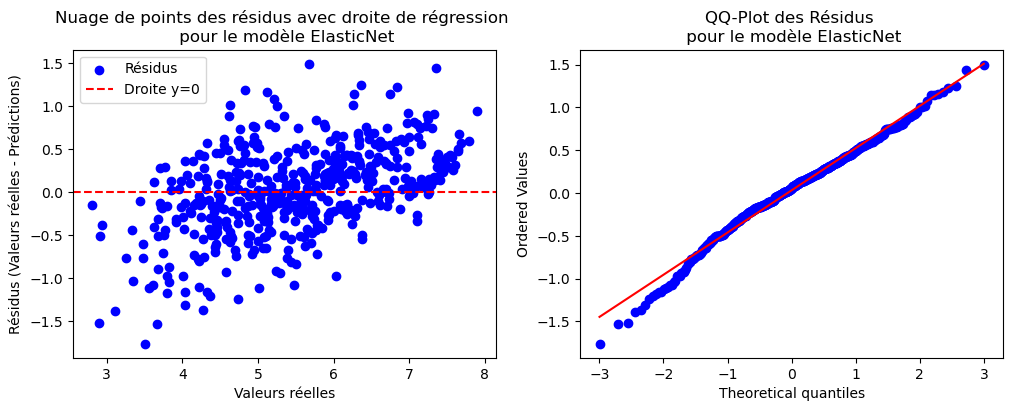

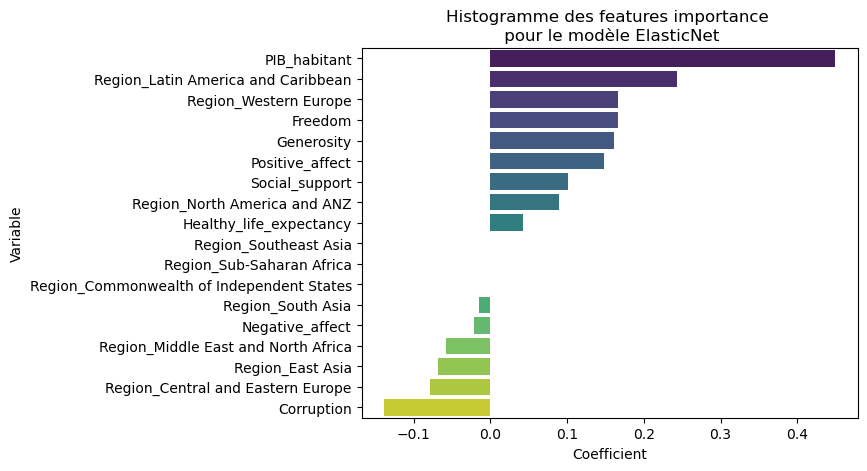

,Variable,Coefficient
0,PIB_habitant,0.448866
1,Region_Latin America and Caribbean,0.242974
2,Region_Western Europe,0.166668
3,Freedom,0.166596
4,Generosity,0.160685
5,Positive_affect,0.148424
6,Social_support,0.100963
7,Region_North America and ANZ,0.089177
8,Healthy_life_expectancy,0.042694
9,Region_Southeast Asia,-0.000000


In [26]:
# Créer une DataFrame avec les noms des variables
coefficients_df_elast = pd.DataFrame({
    "Variable": feats.columns,  # Noms des variables
    "Coefficient": elast_reg.coef_  # Coefficients associés
})


residuals_elast = y_test - y_pred

plt.figure(figsize = (12,4))
plt.subplot(121)

# Tracer le nuage de points des résidus avec la droite de régression
plt.scatter(y_test, residuals_elast, label='Résidus', c ="blue")
plt.axhline(y=0, color='r', linestyle='--', label='Droite y=0')
plt.title("Nuage de points des résidus avec droite de régression \n pour le modèle ElasticNet")
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus (Valeurs réelles - Prédictions)")
plt.legend()


#Afficher le QQplot

plt.subplot(122)
stats.probplot(residuals_elast, dist="norm", plot=plt)
plt.title("QQ-Plot des Résidus \n pour le modèle ElasticNet")
plt.show()


#Afficher les features importance et ses coefficients

coefficients_df_sorted_elast = coefficients_df_elast.sort_values(by = "Coefficient", ascending = False).reset_index()
coefficients_df_sorted_elast.drop("index", axis = 1, inplace = True)

sns.barplot(y = "Variable", x = "Coefficient", 
            data = coefficients_df_sorted_elast, palette = "viridis")
plt.title("Histogramme des features importance \n pour le modèle ElasticNet")
plt.show()

display(coefficients_df_sorted_elast)


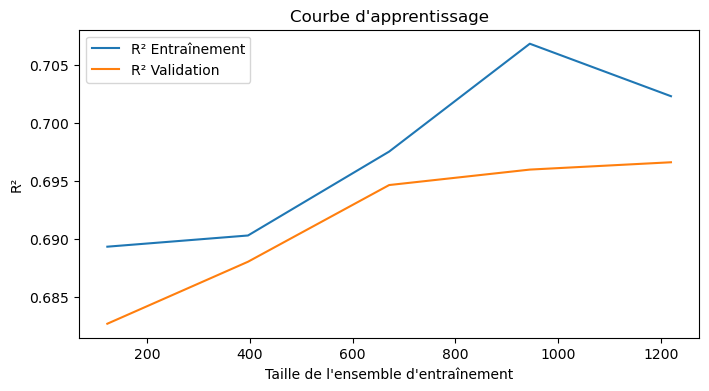

In [27]:
#Afficher la courbe d'apprentissage

# Augmenter la taille de l'ensemble d'entraînement
increased_size = int(3 * len(X_train))
    
train_sizes, train_scores, test_scores = learning_curve(
        elast_reg, X_train[:increased_size], y_train[:increased_size], cv=5, scoring='r2'
    )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='R² Entraînement')
plt.plot(train_sizes, test_scores_mean, label='R² Validation')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('R²')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()
